In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class unfold:
    def __init__(self, events, incorrAss = 0.0, deficit = 1):
        """
        Prameters:
        events: ndarray
            messaered Events
        incorrAss: float 
            incorrect Assigment 
        deficit: float
            loss of results
        Returns:
        ansM = answer matrix
        b = invert answer matrix
        """
        self.events = events
        self.deficit = deficit
        self.incorrAss = incorrAss
        self.zw = np.ones(len(events))-incorrAss  
        self.zw[1:-1] = self.zw[1:-1] -incorrAss
        self.ansM = deficit*(np.diagflat(self.zw) + np.diagflat(np.array([incorrAss]*(len(events)-1)),-1) + np.diagflat(np.array([incorrAss]*(len(events)-1)),1))
        self.B = np.matrix(np.linalg.inv(self.ansM))
      
    def calcKov(self):
        self.Kov = self.B*np.diagflat(self.events)*np.transpose(self.B)
        return self.Kov
        
    def trueEvents(self):
        self.f = self.B*np.array(self.events).reshape(len(self.events),1)
        return self.f

# Aufgabe 2

## d)

In [5]:
a = unfold(np.array([200,169]), deficit=0.8, incorrAss=0.1)
print(a.calcKov())
print("f = ",a.trueEvents())

[[ 399.63378906  -81.07910156]
 [ -81.07910156  339.08691406]]
f =  [[ 254.84375]
 [ 206.40625]]


## e)

In [6]:
b = unfold(np.array([200,169]), deficit=0.8, incorrAss=0.4)
print(b.calcKov())
print("f = ",b.trueEvents())

[[ 3868.75   -3459.375 ]
 [-3459.375   3626.5625]]
f =  [[ 327.5 ]
 [ 133.75]]


# Aufgabe 3

gemessenen Ereignisszahlen  wahre Verteilung
260.16 193
459.01 485
650.2 664
760.46 783
799.4 804
798.79 805
775.09 779
733.93 736
682.62 684
625.54 626
566.46 566
508.46 508
452.92 452
400.69 400
352.38 351
308.69 308
269.15 268
233.92 233
202.46 202
179.67 173


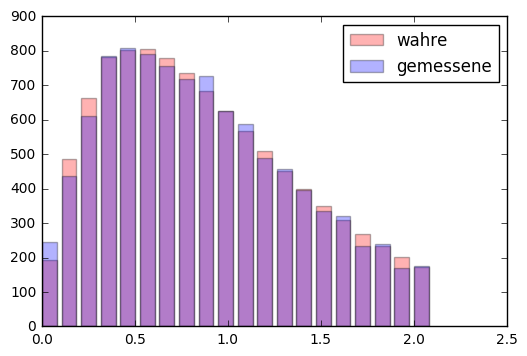

In [10]:
f = np.array([193,485,664,783,804,805,779,736,684,626,566,508,452,400,351,308,268,233,202,173])
task3 = unfold(f, incorrAss=0.23)
g = np.matmul(task3.ansM,f)
D = np.diagflat(np.sort(g, axis=None)[::-1])
print("gemessenen Ereignisszahlen"," wahre Verteilung")
for x in range(len(f)):
    print(g[x] , f[x])
g_mess = np.random.poisson(np.matmul(task3.ansM,f)) 
plt.bar(np.linspace(0,2,20), f, width=0.08, color ="red", alpha=0.3, label="wahre")
plt.bar(np.linspace(0,2,20), g_mess, width=0.08, alpha=0.3, label="gemessene")
plt.legend(loc="best")
plt.show()

## c)

In [11]:
wert , vec = np.linalg.eig(task3.ansM)
test = np.argsort(wert)[::-1]
D = np.diagflat(wert[test])
U = vec[test]

## d)

[193 485 664 783 804 805 779 736 684 626 566 508 452 400 351 308 268 233
 202 173]
b =  [  1.11661871e-01  -1.82493690e-01  -2.96928938e-01   9.37136578e-04
   1.41086597e-01   2.54751714e-01  -2.06620158e-01  -2.28427214e-02
   3.05988101e-01   4.99591356e-01   4.86944192e-01   1.57258224e-01
  -4.50626380e-01   1.35383882e+00  -2.48264700e+00  -2.06001436e+01
   9.61868434e+00  -4.52743475e+00  -5.55454099e-01   5.16789571e+00]


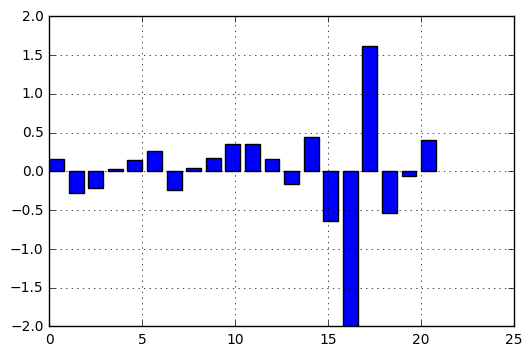

In [16]:
b = np.matmul(np.linalg.inv(U),f)
c = np.matmul(np.linalg.inv(U),g)
print(f)
kov = np.matmul(np.linalg.inv(U), np.matmul(np.diagflat(f),np.transpose(np.linalg.inv(U))))
b_ = np.matmul(np.linalg.inv(D), np.matmul(np.linalg.inv(U), g_mess))
print("b = ", b_/np.diag(kov))
plt.bar(np.linspace(0,20,20),b/np.diag(kov))
plt.grid()
plt.ylim(-2,2)
#plt.yscale('log')
plt.show()